## Método de composición 

Mediante este método la distribución de probabilidad $f(x)$ se expresa como una mezcla de varias distribuciones $f_{i}(x)$ seleccionadas adecuadamente.

* $\textbf{Pasos:}$
  * Dividir la distribución de probabilidad original en sub-áreas.
  * Definir una distribución de probabilidad para cada sub-área.
  * Expresar la distribución de probabilidad original en la forma siguiente:
    $$f(x)=\sum\limits_{i=1}^{n}f_{i}(x)A_{i}=1 $$
  * Obtener la distribución acumulada de las áreas.
  * Generar dos números uniformes $U_{1},U_{2}$.
  * Seleccionar la distribución de probabilidad $f_{i}(x)$ con la cual se va simular el valor $x$. La selección de esta distribución se obtiene al aplicar el método de la transformada inversa, en el cual el eje $Y$ está representado por las distribución acumulada de las áreas, y el eje $X$ por las distribuciones $f_{i}(x)$. Para esta selección se utiliza el número uniforme $U_{1}$.
  * Utilizar el número uniforme $U_{2}$ para simular por el método de la transformada inversa o algún otro método.



### Ejemplo: Distribución triangular. 

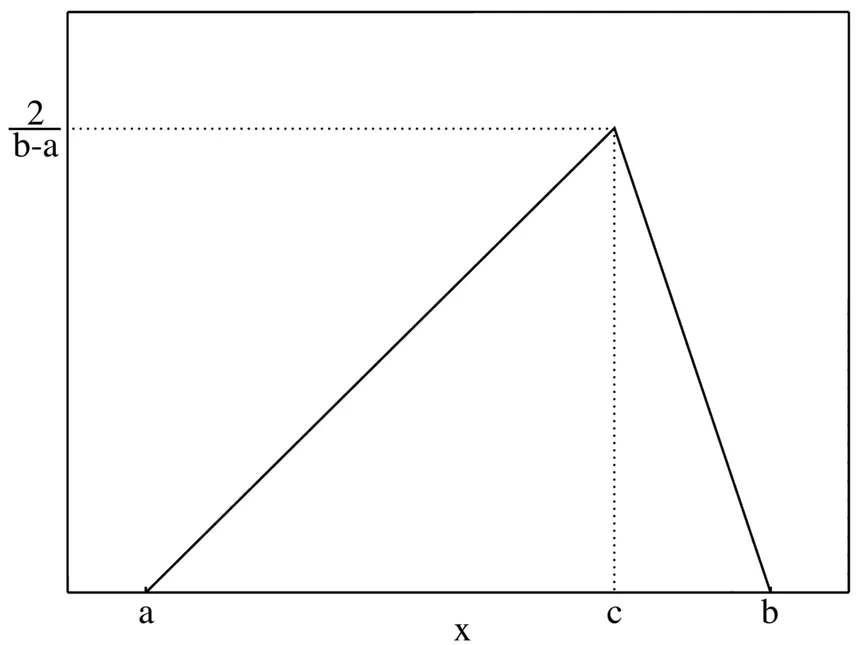



Se puede dividir en dos Areas:

$$A_{1}=\frac{(c-a) \cdot \frac{2}{(b-a)}}{2}= \frac{c-a}{b-a}$$

$$A_{2}=\frac{ (b-c)\cdot \frac{2}{(b-a)} }{2} = \frac{b-c}{b-a}$$


Ahora obtenemos las funciones de probabilidad de cada area. 

* $f_{1}(x)$

$$m_{1}=\frac{y_{2}-y_{1}}{x_{2}-x_{1}}= \frac{ \frac{2}{b-a} - 0  }{c-a} = \frac{2}{(b-a)(c-a)} $$

$$y-y_{1}=m(x-x_{1}) \Longrightarrow y= \frac{2}{(b-a)(c-a)} (x-a) 
$$

* $f_{2}(x)$
  
$$m_{2}=\frac{0-\frac{2}{b-a}}{b-c}=-\frac{2}{(b-a)(b-c)}   $$

$$y - 0 =-\frac{2}{(b-a)(b-c)}(x-b) \Longleftrightarrow y = \frac{2}{(b-a)(b-c)}(b-x)  $$


Entonces podemos decir que:

$$ f(x)= \begin{cases}  \frac{2}{(b-a)(c-a)} (x-a) & a\leq x < c \\  \frac{2}{(b-a)(b-c)}(b-x) & c \leq x \leq b 
\end{cases}$$
Es decir,

$$ f(x)= \frac{2}{(b-a)(c-a)} (x-a) + \frac{2}{(b-a)(b-c)}(b-x) $$

Ahora calculamos $F(x)$

$$ F(x) = \begin{cases}  \frac{(x-a)^{2}}{(b-a)(c-a)} & a\leq x < c \\   1 -  \frac{(b-x)^{2}}{(b-a)(b-c)} & c \leq x \leq b  \end{cases}$$


Pero recordemos que se expresa como 
$$f(x)=\sum\limits_{i=1}^{m} A_{i}f_{i}(x) $$
Por lo que factorizando $A_{1}$ y $A_{2}$ respectivamente, tenemos que:


$$f(x)=\frac{c-a}{b-a} \cdot \frac{2}{(c-a)^{2}}(x-a) + \frac{b-c}{b-a} \cdot \frac{2}{(b-c)^{2}} (b-x) $$

Entonces:

* $f_{1}(x) = \frac{2}{(c-a)^{2}}(x-a) \Longrightarrow F_{1}(x) = \frac{ (x-a)^{2} }{(c-a)^{2} }$
* $f_{2}(x) = \frac{2}{(b-c)^{2}} (b-x) \Longrightarrow F_{2}(x) = \frac{ (b-x)^{2} }{(b-c)^{2} } $

Entonces usaremos $F_{1}(x)$ y $F_{2}(x)$ para generar a la distribución 

De la funcion de Distribución acumulada podemos ver los intervalos.

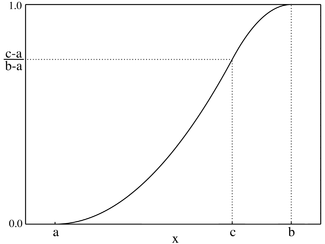

Por lo que ahora de igual manera que en transformada inversa mapeamos en el $(0,1)$
y depejando $x$ en ambos caso tenemos que:

* Con $u \sim U(0,1)$
* si $ 0 \leq u < \frac{c-a}{b-a}$.


$$ F_{1}(x) = \frac{ (x-a)^{2} }{(c-a)^{2} }=u \Longleftrightarrow  x= a+(c-a)\sqrt(u)$$

* si $\frac{c-a}{b-a} \leq u \leq 1$

Generamos $F_{2}(x)$:

$$F_{2}(x) = \frac{ (b-x)^{2} }{(b-c)^{2} }=u \Longleftrightarrow x = b-(b-c)\sqrt(u) $$



In [31]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
def triang_comp(a,c,b,N):
    C=[]
    # Valores utilizados en todo el programa calculados para "no hacer cuentas" innecesarias
    d1=(b-a) 
    d2=(b-c)
    d3=(c-a)
    
    for i in range(N):
        x=rd.random() # Con este decidimos que distribución genera
        y=rd.random() # Con este generamos la distribución
        if x < d3/d1:
            X=a+d3*np.sqrt(y)
            C.append(X)
        else:
            X=b-d2*np.sqrt(y)
            C.append(X)
             
    return C

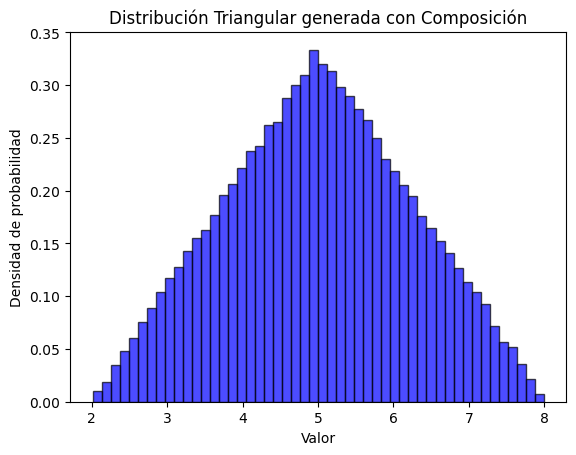

In [30]:
G=triang_comp(2,5,8,99999)
plt.hist(G, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Triangular generada con Composición')


# Mostrar la gráfica
plt.show()

$\textbf{Nota:}$ El codigo este en "Catalogo de distribuciones" en el Github